<a href="https://colab.research.google.com/github/Nhutsang/Baocaogiuaky/blob/main/CNNFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy

In [35]:
folder = '/content/drive/MyDrive/TrainAI/Trainning/'

In [36]:
img_size = 100;
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('sang'):
    output = 1.0
  if file.startswith('minh'):
    output = 2.0
  if file.startswith('Phuc'):
    output = 3.0
  if file.startswith('Hoang'):
    output = 4.0
  if file.startswith('duynhat'):
    output = 5.0
  if file.startswith('Loc'):
    output = 6.0
  
  photo = load_img(folder + file, target_size = (img_size,img_size))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = np.array(labels)
print(photos.shape, labels.shape)


(100, 100, 100, 3) (100,)


In [37]:
photos = photos.astype('float32')/255.0
print(photos.shape)
     

(100, 100, 100, 3)


In [38]:
(trainX, testX, trainY, testY) = train_test_split(photos, labels, test_size=0.20, stratify=labels, random_state=10)
(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.25, random_state=10)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)

(60, 100, 100, 3)
(60,)
(20, 100, 100, 3)
(20,)
(20, 100, 100, 3)
(20,)


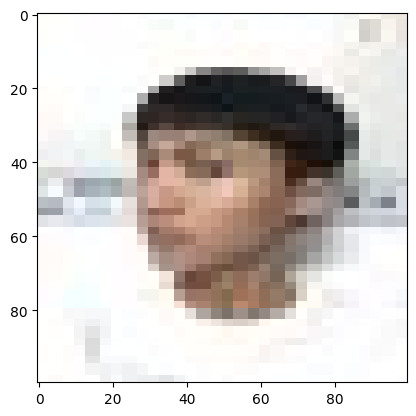

Hinh này là:  [0. 1. 0. 0. 0. 0. 0.]


In [43]:
image_test= 30
hinh = trainX[image_test]
plt.imshow(hinh) 
plt.show()  
print('Hinh này là: ', trainY[image_test])

In [39]:
 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (trainY)
testY=to_categorical(testY)
valY=to_categorical(valY)

print(trainY.shape)
print(testY.shape)
print(valY.shape)

(60, 7)
(20, 7)
(20, 7)


In [40]:
batch_size=32
epochs= 50
classes = 7

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()
# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape=(img_size,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))
# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))
# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))
# Bộ 4 VGG
model.add(Conv2D(256,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))
# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(512, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     
model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

In [26]:
start = time()
train = model.fit(trainX, trainY, batch_size,epochs=epochs,verbose = 1, validation_data=(valX, valY))
print(time()-start)
     

Epoch 1/50
2/2 [==============================] - 6s 4s/step - loss: 2.4471 - accuracy: 0.2167 - val_loss: 1.9135 - val_accuracy: 0.2500
Epoch 2/50
2/2 [==============================] - 7s 3s/step - loss: 1.8860 - accuracy: 0.2833 - val_loss: 1.9053 - val_accuracy: 0.0500
Epoch 3/50
2/2 [==============================] - 4s 2s/step - loss: 1.8180 - accuracy: 0.2333 - val_loss: 1.7589 - val_accuracy: 0.4000
Epoch 4/50
2/2 [==============================] - 5s 4s/step - loss: 1.5789 - accuracy: 0.4000 - val_loss: 1.7697 - val_accuracy: 0.2500
Epoch 5/50
2/2 [==============================] - 7s 2s/step - loss: 1.3271 - accuracy: 0.5000 - val_loss: 1.5154 - val_accuracy: 0.4500
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 0.9969 - accuracy: 0.7500 - val_loss: 0.9493 - val_accuracy: 0.6500
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 0.7078 - accuracy: 0.7833 - val_loss: 0.3656 - val_accuracy: 1.0000
Epoch 8/50
2/2 [=========================

In [27]:
model.save('/content/drive/MyDrive/TrainAI/Test/')

Text(0.5, 0, 'Epoch')

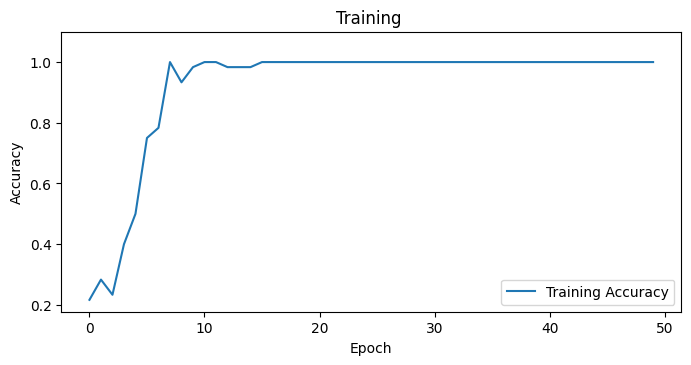

In [41]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')


plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.1])
plt.title('Training ')
plt.xlabel('Epoch')
     

1/1 [==============================] - 0s 138ms/step
Predicted:  sang


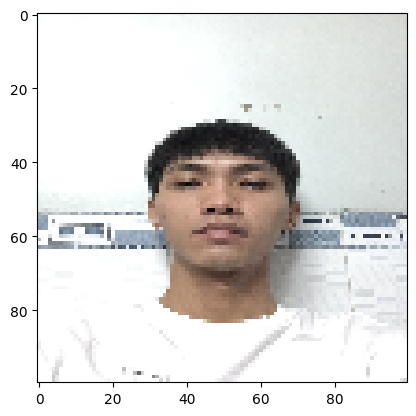

In [30]:
name= {1:'sang', 2:'minh',3:'Phuc',4:'Hoang',5:'duynhat',6:'Loc'}  
#test
filePath = '/content/drive/MyDrive/TrainAI/Check/sang.jpg'
testImage = load_img(filePath, target_size=(img_size,img_size))
arrayImage = img_to_array(testImage).reshape(1,img_size,img_size,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)
    

In [31]:

# Tạo một mảng các chỉ số ngẫu nhiên
random_indices = np.random.choice(len(testX), size=20, replace=False)

# Lấy ra 30 mẫu ngẫu nhiên từ tập dữ liệu testX và testY
random_testX = testX[random_indices]
random_testY = testY[random_indices]

# Dùng mô hình để dự đoán nhãn của các mẫu trong tập dữ liệu ngẫu nhiên
results = model.predict(random_testX)
predicted_labels = np.argmax(results, axis=1)

from sklearn.metrics import accuracy_score
# tính độ chính xác 
accuracy = accuracy_score(np.argmax(random_testY, axis=1), predicted_labels)
print("Accuracy:", accuracy*100,"%")

1/1 [==============================] - 0s 201ms/step
Accuracy: 100.0 %
